### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt



In [2]:
key = "VNM"
result = pd.read_csv(r'E:\Data_Stock\excel_bcg.csv')
result["Date"] = pd.to_datetime(result["<DTYYYYMMDD>"], format='%Y%m%d')
result['Open'] = pd.to_numeric(result['<OpenFixed>'].astype(str)) * 1000
result['Close'] = pd.to_numeric(result['<CloseFixed>'].astype(str)) * 1000
result['High'] = pd.to_numeric(result['<HighFixed>'].astype(str)) * 1000
result['Low'] = pd.to_numeric(result['<LowFixed>'].astype(str)) * 1000
result['Volume'] = pd.to_numeric(result['<Volume>'].astype(str))
data_finish = result[['Date','Open','High','Low' ,'Close','Volume']].copy()
#data_finish

In [3]:
df = data_finish

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-07-16,16500.0,18000.0,16200.0,17900.0,2201970
1,2015-07-17,17900.0,19100.0,17600.0,19000.0,1585500
2,2015-07-20,19000.0,20300.0,18900.0,20000.0,1404650
3,2015-07-21,19900.0,19900.0,18600.0,18600.0,163790
4,2015-07-22,17300.0,17300.0,17300.0,17300.0,1860


In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume
1835,2022-11-14,5240.0,5240.0,5240.0,5240.0,766200
1836,2022-11-15,4880.0,4880.0,4880.0,4880.0,742600
1837,2022-11-16,4540.0,5220.0,4540.0,5200.0,17775500
1838,2022-11-17,5400.0,5540.0,5250.0,5300.0,6140600
1839,2022-11-18,5280.0,5670.0,4930.0,5430.0,10576300


In [6]:
df1 = df.reset_index()['Close']

In [7]:
df1

0       17900.0
1       19000.0
2       20000.0
3       18600.0
4       17300.0
         ...   
1835     5240.0
1836     4880.0
1837     5200.0
1838     5300.0
1839     5430.0
Name: Close, Length: 1840, dtype: float64

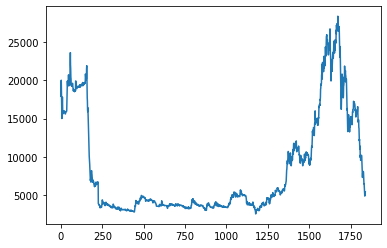

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
df1

0       17900.0
1       19000.0
2       20000.0
3       18600.0
4       17300.0
         ...   
1835     5240.0
1836     4880.0
1837     5200.0
1838     5300.0
1839     5430.0
Name: Close, Length: 1840, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.59493769]
 [0.63757583]
 [0.67633777]
 ...
 [0.10266101]
 [0.1065372 ]
 [0.11157625]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(1288, 552)

In [14]:
train_data

array([[0.59493769],
       [0.63757583],
       [0.67633777],
       ...,
       [0.09196659],
       [0.09169913],
       [0.08798961]])

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1187, 100)
(1187,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(451, 100)
(451,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 7s 181ms/step - loss: 0.0088 - val_loss: 0.0209
Epoch 2/100
19/19 [==============================] - 2s 111ms/step - loss: 0.0016 - val_loss: 0.0066
Epoch 3/100
19/19 [==============================] - 2s 106ms/step - loss: 9.7844e-04 - val_loss: 0.0060
Epoch 4/100
19/19 [==============================] - 2s 107ms/step - loss: 7.6377e-04 - val_loss: 0.0056
Epoch 5/100
19/19 [==============================] - 2s 109ms/step - loss: 6.2531e-04 - val_loss: 0.0115
Epoch 6/100
19/19 [==============================] - 2s 111ms/step - loss: 6.8579e-04 - val_loss: 0.0043
Epoch 7/100
19/19 [==============================] - 2s 109ms/step - loss: 5.8233e-04 - val_loss: 0.0047
Epoch 8/100
19/19 [==============================] - 2s 110ms/step - loss: 4.9895e-04 - val_loss: 0.0041
Epoch 9/100
19/19 [==============================] - 2s 116ms/step - loss: 4.0555e-04 - val_loss: 0.0071
Epoch 10/100
19/19 [==============================] - 2s 122ms/

In [24]:
import tensorflow as tf

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6086.74048957211

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

16443.23008771326

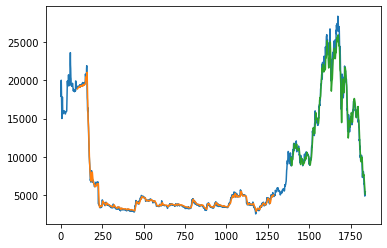

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

552

In [35]:
# Giá trị tại len(test_data) - 100 
x_input=test_data[452:].reshape(1,-1)
x_input.shape


(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.447642304785162,
 0.44376611043277714,
 0.4573327906661241,
 0.4282613330232379,
 0.4146946527898909,
 0.42438513867085303,
 0.4592708878423165,
 0.4398899160803923,
 0.4767137624280482,
 0.47283756807566335,
 0.4864042483090103,
 0.4864042483090103,
 0.49028044266139514,
 0.4767137624280482,
 0.49221853983758757,
 0.48058995678043304,
 0.4786518596042406,
 0.47283756807566335,
 0.4515184991375468,
 0.4515184991375468,
 0.47089947089947093,
 0.49221853983758757,
 0.5174138031280889,
 0.5135376087757041,
 0.5271042890090509,
 0.5271042890090509,
 0.5329185805376282,
 0.5348566777138207,
 0.5697424268852841,
 0.5678043297090917,
 0.5445471635947827,
 0.5658662325328992,
 0.5619900381805144,
 0.5619900381805144,
 0.5561757466519371,
 0.5561757466519371,
 0.5522995522995524,
 0.5387328720662055,
 0.5290423861852434,
 0.5212899974804738,
 0.5290423861852434,
 0.5135376087757041,
 0.49028044266139514,
 0.49415663701378,
 0.5019090257185496,
 0.503847122894742,
 0.5232280946566662,
 0.5193

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
# i 30
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09276662]
101
[[[0.44376611]
  [0.45733279]
  [0.42826133]
  [0.41469465]
  [0.42438514]
  [0.45927089]
  [0.43988992]
  [0.47671376]
  [0.47283757]
  [0.48640425]
  [0.48640425]
  [0.49028044]
  [0.47671376]
  [0.49221854]
  [0.48058996]
  [0.47865186]
  [0.47283757]
  [0.4515185 ]
  [0.4515185 ]
  [0.47089947]
  [0.49221854]
  [0.5174138 ]
  [0.51353761]
  [0.52710429]
  [0.52710429]
  [0.53291858]
  [0.53485668]
  [0.56974243]
  [0.56780433]
  [0.54454716]
  [0.56586623]
  [0.56199004]
  [0.56199004]
  [0.55617575]
  [0.55617575]
  [0.55229955]
  [0.53873287]
  [0.52904239]
  [0.52129   ]
  [0.52904239]
  [0.51353761]
  [0.49028044]
  [0.49415664]
  [0.50190903]
  [0.50384712]
  [0.52322809]
  [0.5193519 ]
  [0.50772332]
  [0.51353761]
  [0.51353761]
  [0.51547571]
  [0.53485668]
  [0.54260907]
  [0.51353761]
  [0.47089947]
  [0.46702328]
  [0.46314708]
  [0.47671376]
  [0.46896137]
  [0.43601372]
  [0.43407562]
  [0.39918988]
  [0.37011842]
  [0.37787081]
  [0.34492315]
  [0.327

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
len(df1)

1840

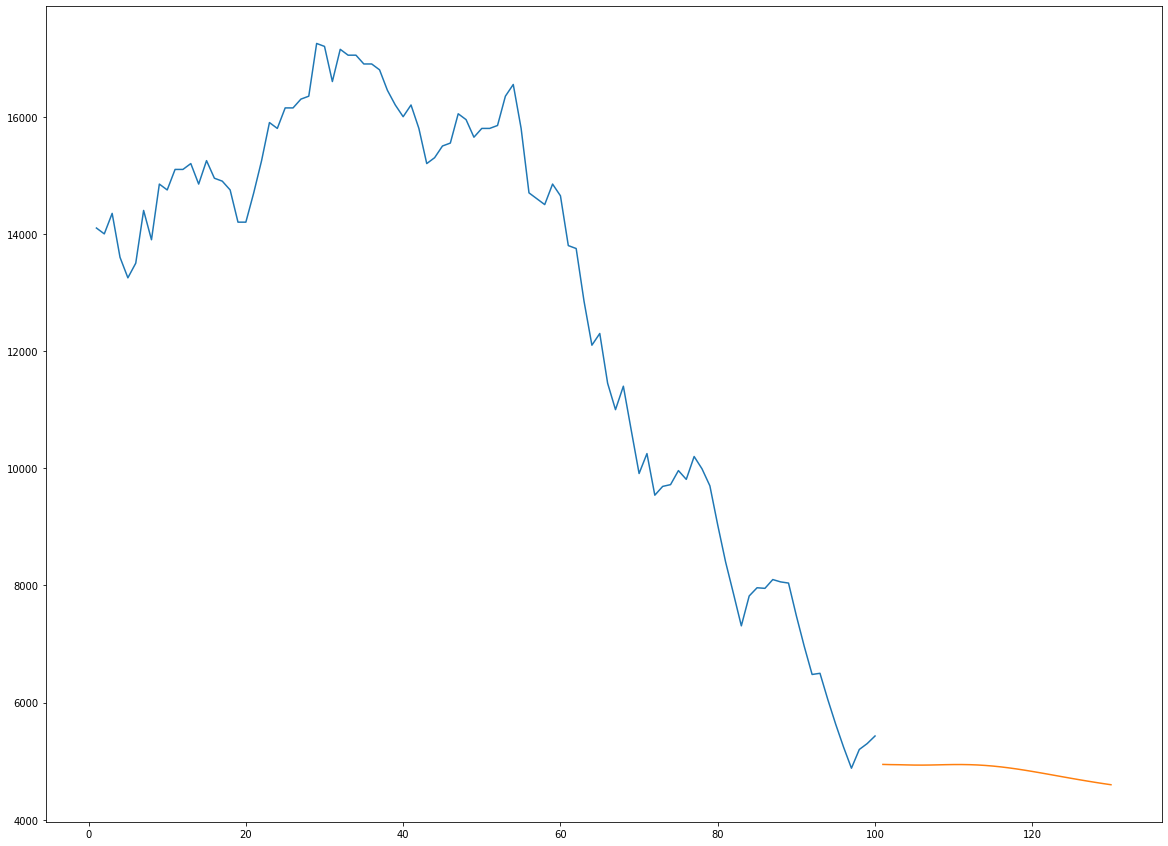

In [42]:
# giá trị tại len(df1) - 100
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(day_new,scaler.inverse_transform(df1[1740:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

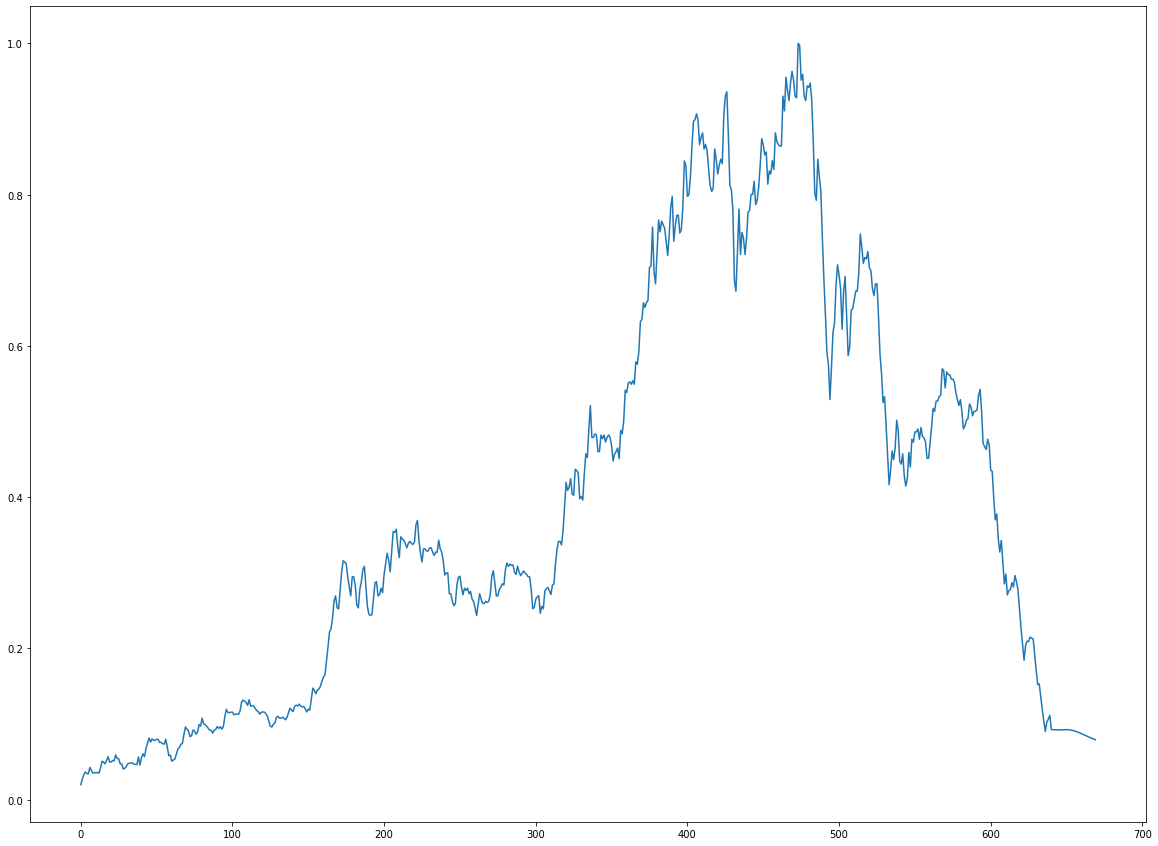

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(df3[1200:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()

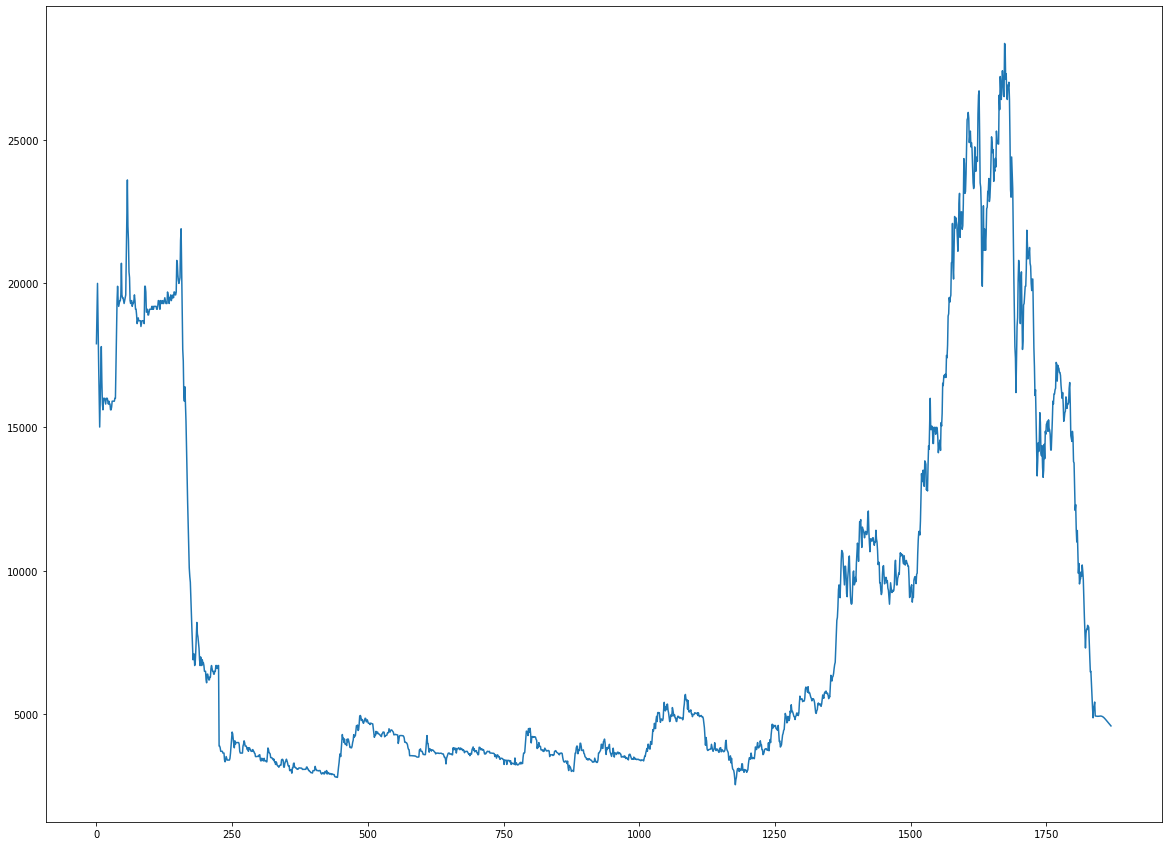

In [45]:
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(df3)


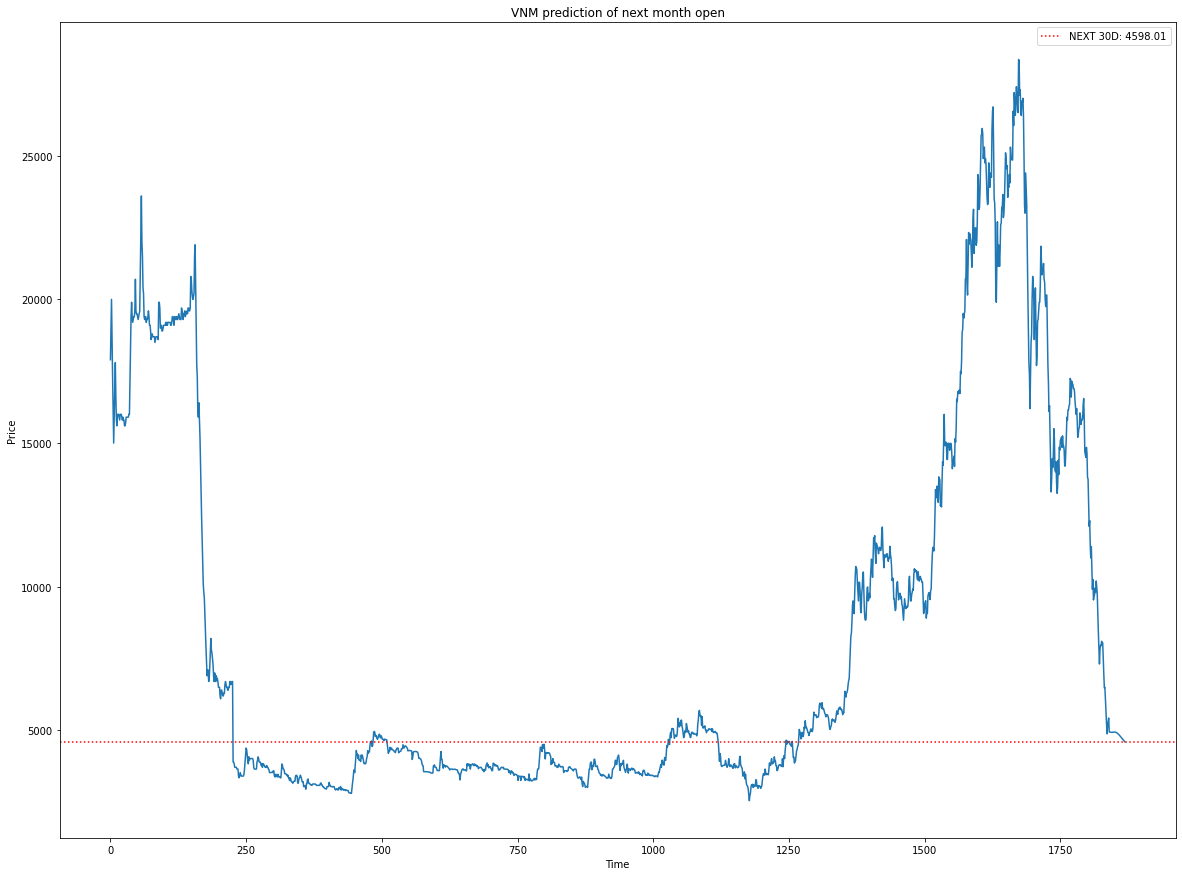

In [46]:
ds_new = df1.tolist()
ds_new.extend(lst_output)
#Creating final data for plotting
final_graph = scaler.inverse_transform(ds_new).tolist()

#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(key))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()